# Figure 3A: Model Reliance on Frequency Groups per Subject

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import scipy.io as io
import os
from functions.helpers import *

# Set plotting defaults
plt.rcParams["font.family"] = "Arial"
plt.style.use('default')
sns.set_style("whitegrid")
font = {'size'   : 7}
mpl.rc('font', **font)

In [17]:
# Load data
roi_mr = pd.read_csv('results/roi_mr.csv')
freq_mr = pd.read_csv('results/freq_mr.csv')

# Rescale MR to percent
roi_mr = 100*roi_mr 
freq_mr = 100*freq_mr 

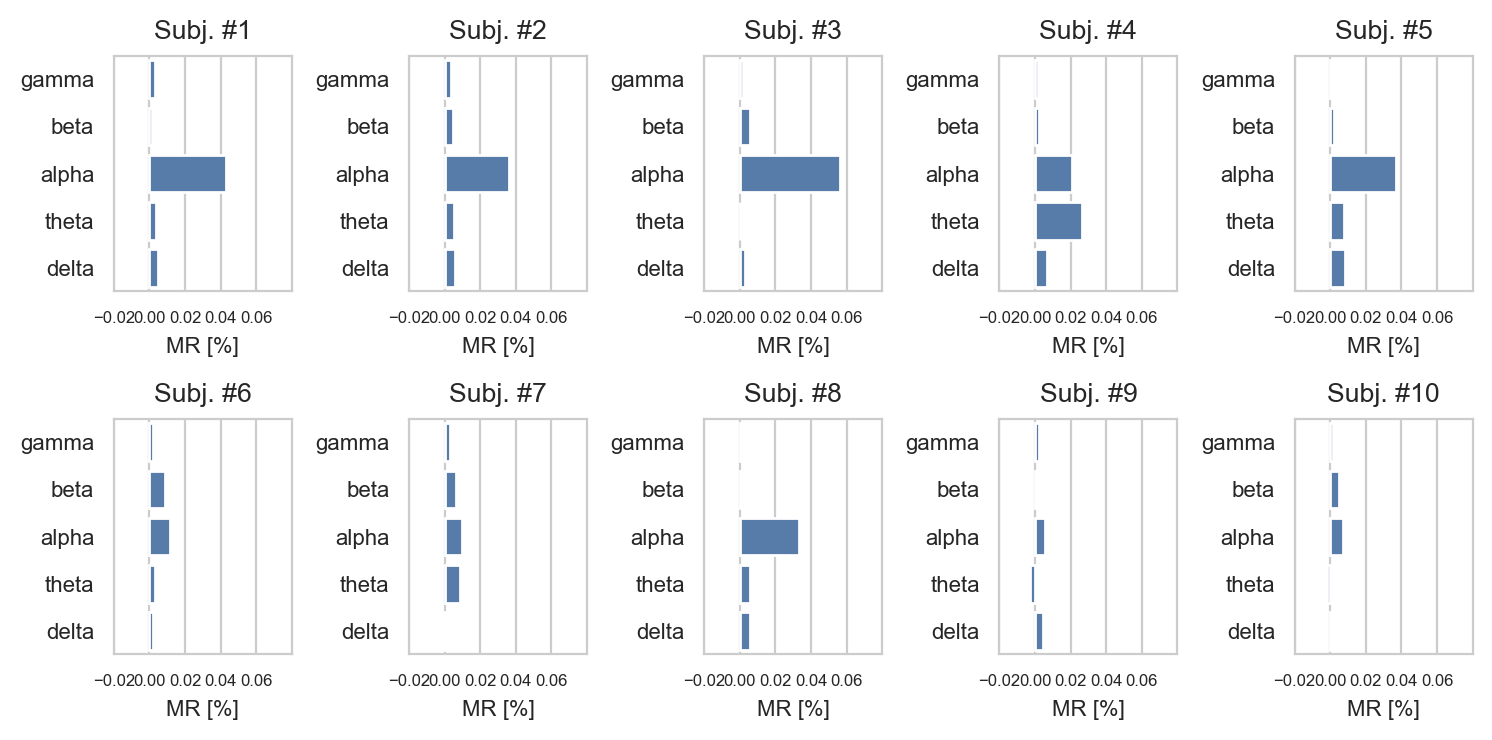

In [18]:
# Build plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(7.5,3.75))
for i, ax in enumerate(axes.flatten()): 
    dat = pd.DataFrame(freq_mr.iloc[i])
    dat.transpose()
    dat = pd.melt(dat.transpose(), value_vars=['delta','theta','alpha',
                                      'beta','gamma'],
                             var_name='feature', value_name='mr')

    subj_nr = 'Subj. #' + str(i+1)

    sns.barplot(y="feature", x="mr", data=dat,
                       label="Total", color="#4a7ab7", ax=ax).set(ylabel='', xlabel='MR [%]', title=subj_nr)
    ax.set_xlim(-0.02,0.08)
    ax.set_xticks(np.arange(-0.02,0.08, 0.02))
    ax.tick_params(axis='x', which='major', labelsize=6)
    ax.invert_yaxis()
fig.tight_layout()
plt.savefig('plots/Fig3A.eps') 